# LINEAR REGRESSION MODELLERİ İLE ELMAS FİYATINI TAHMİN ETME 


![elmas](gorsel/d.jpg)


**Projenin amacı  Kaggle ' da bulunan Diamonds (https://www.kaggle.com/shivam2503/diamonds) verisetini kullanarak Linear Regression modelleri ile elmas fiyatını tahmin etmeye çalışmaktır.**

1. [Veri Yükleme ve Genel Bilgiler](#1)
2. [Değişken Tanımları ve Dönüşümleri](#2)
3. [Görselleştirme](#3)
4. [Veri Önişleme](#4)<br>
    4.1. [Missing Value Analizi](#4.1)<br>
    4.2  [Outlier Analizi](#4.2)<br>
    4.3  [Standardization](#4.3)<br>
    4.4  [One Hot Encoding](#4.4)<br>
5. [Linear Regression Modelleri](#5)<br>
    5.1. [Multiple Linear Regresyon](#5.1)<br>
    5.2  [Ridge Regression](#5.2)<br>
    5.3  [Lasso Regression](#5.3)<br>
    5.4  [ElasticNet Regression](#5.4)<br>

In [356]:
# Gerekli kütüphanelerin yuklenmesi 

import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

<a id = "1"> </a> <br>
# Veri Yükleme ve Genel Bİlgiler 

In [357]:
# verisetini yükleme 

data = pd.read_csv("diamonds.csv")

In [358]:
# Verisetinin ilk 5 satırına ulaşma 

data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [359]:
# Veriseti boyutu 

data.shape

(53940, 11)

Veriseti 53940 satır ve 11 sütundan oluşuyor .

<a id= "2">  </a> <br>

# Değişken Tanımları ve Dönüşümleri 

In [360]:
# Verisetindeki değişken isimlerine ulaşma 

data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [361]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [362]:
# Unnamed:0 değişkenini gereksiz oldugu için siliyorum 

data.drop("Unnamed: 0" , axis = 1 , inplace = True )

* carat =  Elmasın kütlesi 
* cut =    Elmasın kesiminin kalitesi
* color =  Elmasın rengi 
* clarity = Elmasın berraklığı
* x =  Elmasın uzunluğu 
* y =  Elmasın genişliği 
* z =  Elmasın derinliği 
* depth =  Elmasın total derinlik yüzdesi ==  2 * z / (x + y)
* table = Elmasın tepesinin genişliği 
* price = Elmasın fiyatı  

In [363]:
# x ,y , z , depth değişkenlerin adlarını daha kolay anlaşılması için değiştiriyorum 

data = data.rename({'x': 'length', 'y': 'width' , 'z':'depth' ,'depth' : 'total_depth'}, axis=1) 

In [364]:
data.head()

,carat,cut,color,clarity,total_depth,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [365]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
total_depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
length,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
width,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
depth,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


**Bu istatistiksel tabloda length , width ve depth değişkenlerinin minimum değeri 0 görünüyor ama bu değişkenlerin 0 olması mümkün değil . Bu yüzden 0 olan değerleri o değişkenlerin ortalamasıyla dolduracağım.**

In [366]:
data[["length"]] = data[['length']].replace(0,data.length.mean())
data[["width"]] = data[['width']].replace(0,data.width.mean())
data[["depth"]] = data[['depth']].replace(0,data.depth.mean())

In [367]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.20,0.40,0.70,1.04,5.01
total_depth,53940.0,61.749405,1.432621,43.00,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.00,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.00,950.00,2401.00,5324.25,18823.00
length,53940.0,5.732007,1.119587,3.73,4.71,5.70,6.54,10.74
width,53940.0,5.735270,1.140265,3.68,4.72,5.71,6.54,58.90
depth,53940.0,3.540046,0.702400,1.07,2.91,3.53,4.04,31.80


In [368]:
# object değişkenleri kategorik değişkene dönüştürme işlemi yapıyorum 

data.cut = pd.Categorical(data.cut)
data.color = pd.Categorical(data.color)
data.clarity= pd.Categorical(data.clarity)

In [369]:
# Kategorik Değişkenlerdeki unique değerleri 


print("Color Değişkenindeki Kategori Sayısı : " , data.color.nunique())
print(data.color.value_counts())

Color Değişkenindeki Kategori Sayısı :  7
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


**Color Değişkeni D en iyi J en kötü olacak şekilde sıralanıyor .**

In [370]:
print("Cut Değişkeninin Kategori Sayısı : " , data.cut.nunique())
print(data.cut.value_counts())

Cut Değişkeninin Kategori Sayısı :  5
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


In [371]:
print("Clarity Değişkeninin Kategori Sayısı : " , data.clarity.nunique())
print(data.clarity.value_counts())

Clarity Değişkeninin Kategori Sayısı :  8
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


**Clarity değişkeni I1 (en kötü ), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (en iyi) şeklinde değerler alarak sıralanıyor .**

<a id = "3"> </a> <br>
# Görselleştirme 

In [372]:
# Görselleştirme Kütüphaneleri 

import seaborn as sns 
import matplotlib.pyplot as plt


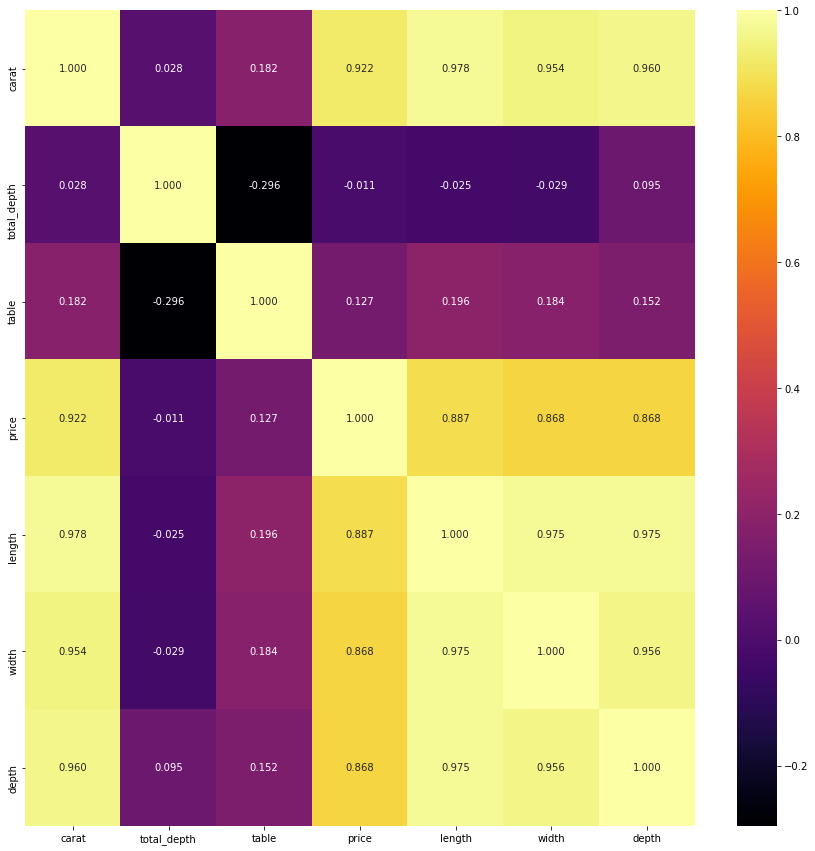

In [373]:
# Korelasyon haritası ile değişkenler arasındaki ilişkiyi gözlemleme

f,ax = plt.subplots(figsize = (15,15)) # grafiğin boyutunu belirleme
sns.heatmap(data.corr() , annot = True , cmap = "inferno" , fmt = ".3f");

# fmt = 0 dan sonra kaç tane basamağın görünmesini belirleme
#  annot = kutucukların içine sayıların görünmesi 
# cmap = grafiğin renklerinin düzenlenmesi 

**price , depth , width ve length değişkenleri arasında güçlü bir ilişkinin oldugunu söyleyebiliriz .**

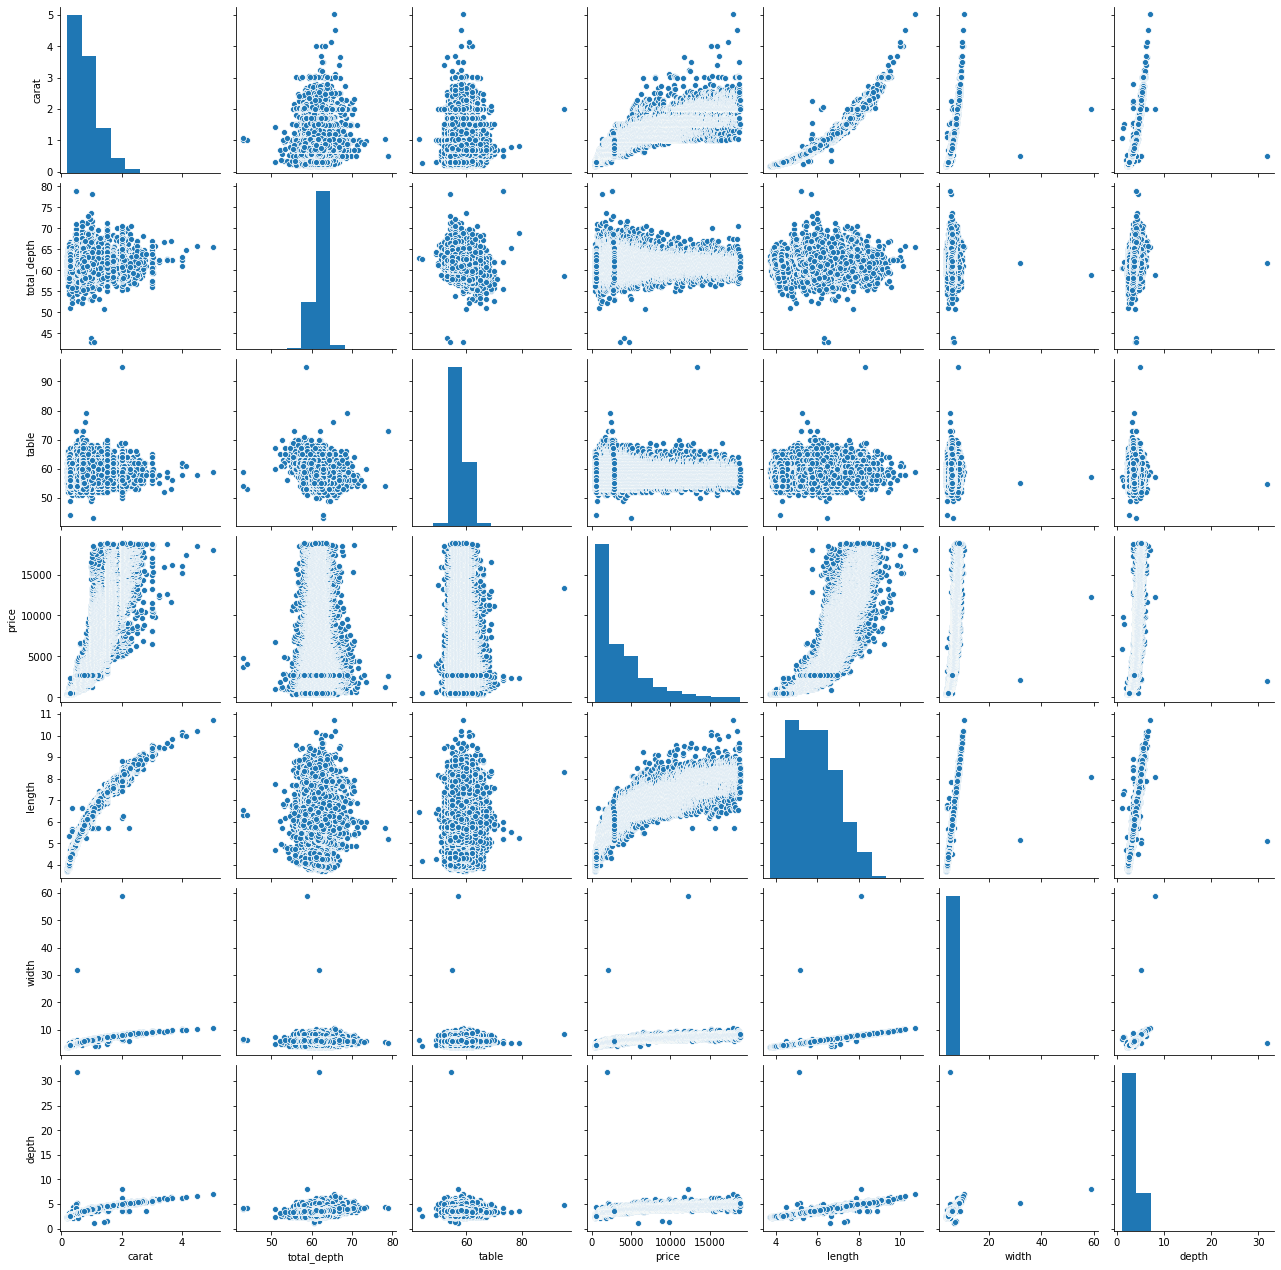

In [376]:
# pairplot ile tüm değişkenlerin birbiriyle ilişkisini görselleştirme 

sns.pairplot(data);

<a id="4" ></a> <br>

# Veri Önişleme

<a id = "4.1" > </a> <br> 

# Missing Value Analizi 

In [377]:
# Missing Value olan değişkenleri ve sayılarını görme
 
data.isnull().sum()

carat          0
cut            0
color          0
clarity        0
total_depth    0
table          0
price          0
length         0
width          0
depth          0
dtype: int64

Verisetimiz missing value içermiyor .

<a id="4.2"></a><br>
# Outlier Analizi

## Outlier Nedir ? 

![Outlier](gorsel/outliers.png)

**İstatistikde outlier (aykırı değer) diğer gözlemlerden önemli ölçüde farklı bir veri noktasıdır.**

**Outlier  Q1-1.5(Q3-Q1) sonucundan küçük ve Q3+1.5(Q3-Q1) büyük olan değerlerdir .**<br>
**(Q3-Q1) = IQR**<br>
**Q3 = Third Quartile(%75)**<br>
**Q1 = First Quartile(%25)**<br>



In [378]:
# önce verisetini kategorik ve numerik olarak ayırıyorum 

kat_data = data.select_dtypes(include=["category"])
kat_data.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [379]:
num_data = data.select_dtypes(include=["int64","float64"])
num_data.head()

,carat,total_depth,table,price,length,width,depth
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


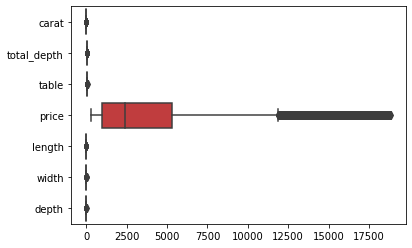

In [380]:
ax = sns.boxplot(data=num_data, orient="h")

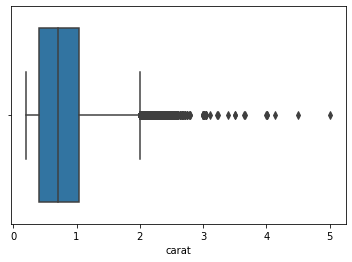

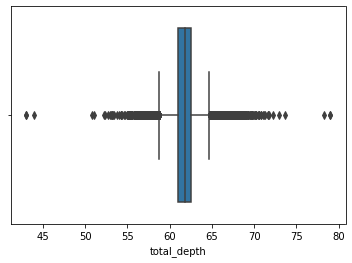

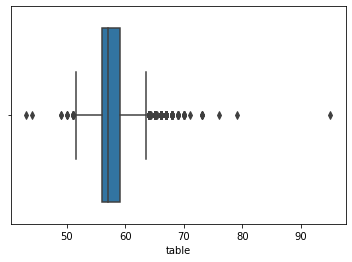

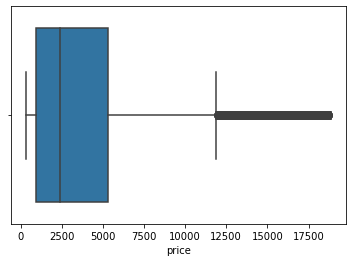

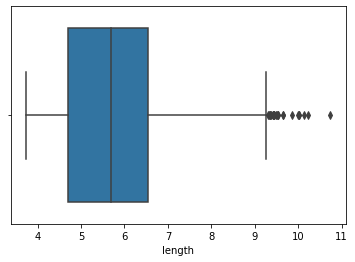

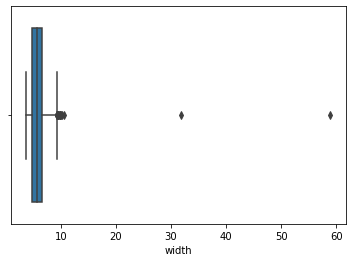

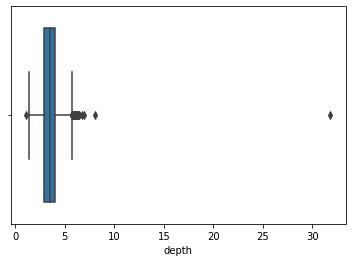

In [381]:
# her değişken için outlier değerlerin ayrı ayrı görselleştirilmesi 

for i, col in enumerate(num_data):
    plt.figure(i)
    sns.boxplot(x=col, data=num_data)

**Bu grafikten price değişkeninde hepsinden  fazla outlier değer olduğunu söyleyebiliriz . Outlier değerleri LOF (Local Outlier Factor) yöntemi ile dolduracağım .**

## LOCAL OUTLİER FACTOR 

![LOF](gorsel/LOF.JPG)


**Burada bir k hiperparametre değeri belirliyoruz .Bu parametre kaç tane komşuya bakılarak karar verileceğini gösterir .Bir değişkenin yerel yoğunluğu komşularının yerel yoğunluklarıyla karşılaştırılarak, benzer yoğunluktaki bölgeler ve komşularından önemli ölçüde daha düşük yoğunluğa sahip noktalar belirlenebilir. Bunlar aykırı değerler olarak kabul edilir .**
 
 
**LOF (k) ~ 1 , komşularla benzer yoğunluk anlamına gelir .**

**LOF (k) <1 , komşulardan daha yüksek yoğunluk anlamına gelir (Inlier) .**

**LOF (k)> 1 , komşulardan daha düşük yoğunluk anlamına gelir (Aykırı Değer) .**

In [382]:
# LOF Yöntemi ile Outlier Analizi

# lof için gerekli olan kütüphane

from sklearn.neighbors import LocalOutlierFactor

In [383]:
# LOF biçimsel özelliklerini barındıran bir nesne oluşturuyoruz 

clf = LocalOutlierFactor(n_neighbors = 20 , contamination = 0.1)

# n_neighbors = komşuluk sayısı
# contamination = yoğunluk


In [384]:
# LOF fit etme 

clf.fit_predict(num_data)


array([-1, -1, -1, ...,  1,  1,  1])

In [385]:
# her bir gözlem için elde edilen LOF skorlarına ulaşma 

data_scores = clf.negative_outlier_factor_  # skorlara ulaşma 
np.sort(data_scores)[0:30]  # skorları sıralama 

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375,
       -3.45066056, -3.42193513, -3.40044967, -3.36779427, -3.35007989,
       -3.32557427, -3.29322345, -3.22070216, -3.19253942, -3.17216736])

Buradaki skorlardan rastgele birini eşik değer olarak belirleyebilirz .  

In [386]:
# 10. değeri eşik değer olarak seçiyorum 

esik_deger = np.sort(data_scores)[10]
esik_deger

-4.056664803552326

In [387]:
# aykırı olmayan değerler
 
aykiri_tf = data_scores > esik_deger
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [388]:
# outlier degerlere erişim 


outlier = num_data[~aykiri_tf]
outlier

,carat,total_depth,table,price,length,width,depth
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12
50773,0.81,68.8,79.0,2301,5.26,5.20,3.58
52860,0.50,79.0,73.0,2579,5.21,5.18,4.09


In [389]:
# outlier değerleri baskılama yöntemi ile doldurma 

baski_deger = num_data[data_scores==esik_deger]
baski_deger

# esik değerin karşılık geldiği gözlem birimindeki değerlerle outlier değerleri dolduracağım

,carat,total_depth,table,price,length,width,depth
45688,0.7,71.6,55.0,1696,5.47,5.28,3.85


In [390]:
# index problemleri olmaması için numpy arrayine çeviriyorum 

res = outlier.to_records(index=False)
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('total_depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('length', '<f8'), ('width', '<f8'), ('depth', '<f8')])

In [391]:
res[:] = baski_deger.to_records(index=False)
res

rec.array([(0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85)],
          dtype=[('carat', '<f8'), ('total_depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('length', '<f8'), ('width', '<f8'), ('depth', '<f8')])

In [392]:
# verisetine yerleştirme 

num_data[~aykiri_tf] = pd.DataFrame(res , index = num_data[~aykiri_tf].index)

In [393]:
num_data[~aykiri_tf]

,carat,total_depth,table,price,length,width,depth
6341,0.7,71.6,55.0,1696,5.47,5.28,3.85
10377,0.7,71.6,55.0,1696,5.47,5.28,3.85
24067,0.7,71.6,55.0,1696,5.47,5.28,3.85
35633,0.7,71.6,55.0,1696,5.47,5.28,3.85
41918,0.7,71.6,55.0,1696,5.47,5.28,3.85
45688,0.7,71.6,55.0,1696,5.47,5.28,3.85
48410,0.7,71.6,55.0,1696,5.47,5.28,3.85
49189,0.7,71.6,55.0,1696,5.47,5.28,3.85
50773,0.7,71.6,55.0,1696,5.47,5.28,3.85
52860,0.7,71.6,55.0,1696,5.47,5.28,3.85


<a id="4.3"></a><br>

# Standardization

![standard](gorsel/standard.png)


**Model oluşturmadan önce bu adımdaki işlemlerle verinin Standart Dağılım gösterecek hale getirilmesi gerekir . Çünkü standart bir dağılım göstermemesi b modelin öğrenmesinde kötü bir performansa sebep olabilecek etkiler doğurabilir.Standard Scaler yöntemi ile kolondaki dagılımın ortalaması 0 ve standart sapması 1 olacak şekilde scaling yapacağım .**

In [394]:
# gerekli kütüphanenin import edilmesi

from sklearn.preprocessing import StandardScaler

In [395]:
num_data.head()

,carat,total_depth,table,price,length,width,depth
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [396]:
# önce bağımlı ve bağımsız değişkenlerimi ayırıyorum 

Y = num_data["price"]  # Bağımlı Değişken
X = num_data.drop('price', axis=1)  # Bağımsız Değişken 

In [397]:
# Scaling işlemi 

X = StandardScaler().fit_transform(X)

<a id="4.4"></a><br>
# One Hot Encoding 

![onehot](gorsel/onehe.png)

**Bu adımda kategorik verilerimizi sayısal verilere dönüştürme işlemi yapacağım .One Hot Encoding, kategorik değişkenlerin ikili (binary) olarak temsil edilmesi anlamına gelmektedir. Bir değişkendeki  her bir sınıfı, o sınıfın unique değerleri uzunluğunda bir vektöre dönüştürür. Daha sonra, her bir tamsayı değeri, 1 ile işaretlenmiş tamsayı indeksi dışında ki tüm değerleri   sıfır  olan bir ikili vektör olarak temsil edilir.**

In [398]:
kat_data.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [399]:
# one-hot-encoding yöntemi 

kat_data = pd.get_dummies(kat_data, columns = ['cut', 'color', 'clarity'], drop_first = True)

In [400]:
kat_data.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [401]:
# modele geçmeden önce numerik ve kategorik olarak ayırdığım değişkenleri birleştiriyorum 

X = pd.DataFrame(X) # X i scaling yaptığım için numpy array formatında oldu , önce onu dataframe yapıyorum 
X = pd.concat([X,kat_data] , axis=1)  #birleştirme işlemi
X.head()

,0,1,2,3,4,5,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198225,-0.175603,-1.101589,-1.591759,-1.578024,-1.604510,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.240422,-1.365593,1.589241,-1.645354,-1.703994,-1.778061,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.198225,-3.395575,3.383127,-1.502433,-1.497042,-1.778061,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.071633,0.454391,0.243826,-1.368444,-1.353075,-1.315259,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,-1.029436,1.084386,0.243826,-1.243388,-1.245100,-1.141708,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


<a id="5"></a><br>

# Doğrusal Regresyon Modelleri

In [402]:
# Modellere geçmeden önce verisetini train test olarak ayırıyorum 

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.20, random_state=46)

<a id="5.1" > </a> <br>

# Multiple Linear Regression 



**Bir tane bağımlı değişken (Y) ile bununla ilişkisi olan bir dizi bağımsız değişken (X) arasındaki ilişkiyi ifade eden doğrusal fonksiyonu hataların en az olacağı şekilde ortaya koymak için yapılan analizdir.**

![mlr1](gorsel/MLR1.png)  ![mlr](gorsel/mlr.png)

##  Multiple Linear Regression Uygulama

In [403]:
# Gerekli kütüphanenin import edilmesi  

from sklearn.linear_model import LinearRegression 

In [404]:
# model kurma adımları 

linear_model = LinearRegression()  # model nesnesi oluşturma
model = linear_model.fit(X_Train , Y_Train) # modeli fit etme
model

LinearRegression()

In [405]:
# kurduğumuz modelle tahmin yapma

model_pred = model.predict(X_Test)
model_pred[0:10]

array([1256.37413851, 3130.69600524, 3195.73930399, 3895.61121402,
       4846.273475  , 6071.52891891,  633.9453679 , 1354.06353947,
       6767.06996339,  521.48067825])

In [406]:
# Tahmin edilen değerlerin gerçek değerleri 

Y_Test.head(10)

42796    1351
2534     3205
53785    2728
53881    2746
10175    4732
13132    5433
30528     733
36048     924
10621    4829
29045     687
Name: price, dtype: int64

In [497]:
# Hata değerlerini Kontrol Etme 

from sklearn.metrics import mean_squared_error , r2_score
mse = mean_squared_error(Y_Test ,model_pred)
mse

1266156.8417184197

**MSE hataların karelerinin ortalamasını, yani tahmini değerler ile gerçek değer arasındaki ortalama kare farkını ölçer.** **Gerçek degerini bildigimiz bagımlı degişkenin  degerini model ile tahmin etmeye çalışıyoruz .Gerçek degerden tahmini degeri çıkarıp karesini alıyoruz . Kaç tane gözlemimiz varsa hepsi için ayrı ayrı bu işlemleri yapıp topluyoruz ve n sayısına bolup ortalamyı alıyoruz . Ortalama bir hata degeri hesaplamış oluyoruz .**

![MSE](gorsel/MSE.gif)

In [464]:
# RMSE (Root Mean Squared Error)

rmse = np.sqrt(mean_squared_error(Y_Test ,model.predict(X_Test)))
rmse

1125.2363492699744

**Root Mean Squared Error   MSE 'nin karekoku alınarak bulunur . MSE' de - sonuç çıkmaması için kare alarak işlem yapıyoruz sonuçlar çok buyuk çıkabileceği için burada sonucun karekokunu alıyoruz bir nevi düzeltme işlemi yapıyoruz aslında.**

![rmse](gorsel/rmse.png)

In [496]:
# r2_score değerini kontrol edelim


r2_score(Y_Test ,model_pred )

0.9205017654158727

<a id="5.2" > </a> <br>

# Ridge Regression

**Ridge regresyonu, L2 düzenlemesi (regularization) kullanılan bir regresyon çeşididir.Amaç hata kareler toplamını minimize ede katsayıları , bu katsayılara bir ceza uygulayarak bulmaktır .**

![ridge](gorsel/ridge.png)



**ƛ = Ayar Parametresi**

    ƛ değeri kullanıcı tarafından belirlenir.ƛ için belirli değerleri içeren bir küme seçilir ve her biri için Cross Validation test hatası hesaplanır . En küçük hata değerini veren ƛ ayar parametresi olarak seçilir . Seçilen ƛ değeri ile model yeniden fit edilir.
    
**Ridge Regression Özellikleri**


* Overfitting durumlarına  karşı dirençlidir .
* Yanlıdır ama varyansı düşüktür .
    * Yanlılık (Bias) : Gerçek değerler ile tahmin edilen değereler arasındaki farkı ifade eder . Eğitim testindeki hata oranıdır .
    * Varyans (Variance) : Modelin test setindeki performansının eğitim setindekine göre değişkenliğinin esnekliğinin değeridir . 
* Çok fazla parametre oldugunda klasik regresyona  göre daha iyi sonuçlar verir. 
* Bagımsız değişkenler arasında yuksek korelasyon olması durumunda etkilidir .
* Tüm değişkenler ile model kurar . İlgisiz değişkenleri modelden çıkarmaz  katsayılarını sıfıra yaklaştırır .
* lambda Ridge Regresyonun optimize edilmesi gereken parametresidir. 




## Ridge Regression Uygulama 

In [498]:
# gerekli kütüphanelerin import edilmesi 

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

In [411]:
#öncelikle modeli vasrayılan alpha (lambda) değeri ile kuruyorum 

ridge_model = Ridge(alpha = 0.1).fit(X_Train ,Y_Train)
ridge_model

Ridge(alpha=0.1)

In [416]:
# tahnmin ettirme 

ridge_model_pred = ridge_model.predict(X_Test)
ridge_model_pred


array([1256.54450853, 3130.05375286, 3195.68905404, ..., 4224.38368736,
       3636.19797492, 3627.91421937])

In [417]:
# model hatası 


ridge_model_rmse = np.sqrt(mean_squared_error(Y_Test,ridge_model_pred))
ridge_model_rmse

1125.2368957465924

## Ridge Regression Hiperparametre Optimizasyonu 

In [418]:
# rastgele lambda değerleri üretiyorum 
 
lambdalar = np.random.randint(0,1000,100)

# 0 ile 100 arasında 100 tane rastgele değer ürettim 

In [419]:
lambdalar

array([914, 534, 899, 547, 367, 107, 286, 931,  77, 107, 194, 101, 687,
        99, 636, 906, 505, 314, 162, 950, 861, 675, 976, 911,  41, 161,
        26, 669, 337, 970, 855, 208, 537, 846,  65, 750, 433, 917, 628,
       787, 661, 120, 786, 116, 111, 681, 505, 575, 604,  37, 379, 429,
       956, 522, 152, 264, 955, 672, 452, 476, 380, 472, 192, 755, 580,
       655, 136,  33, 441, 323, 320,  99, 596, 238,   5, 624, 392, 602,
        87, 729, 408, 840, 476, 805,  85, 514, 599, 455, 447, 270, 205,
       324, 423, 237, 178, 866, 952, 901, 350, 727])

In [455]:
# Cross Validation Yöntemi 

ridge_model_cv = RidgeCV(alphas = lambdalar , scoring = "neg_mean_squared_error" , cv=10 , normalize=True).fit(X_Train , Y_Train)
# cv = cross validationın kaç katlı olacağı değeri 
# scoring = hata kareler ortalaması ya da r2 skoru alınır 
ridge_model_cv

RidgeCV(alphas=array([914, 534, 899, 547, 367, 107, 286, 931,  77, 107, 194, 101, 687,
        99, 636, 906, 505, 314, 162, 950, 861, 675, 976, 911,  41, 161,
        26, 669, 337, 970, 855, 208, 537, 846,  65, 750, 433, 917, 628,
       787, 661, 120, 786, 116, 111, 681, 505, 575, 604,  37, 379, 429,
       956, 522, 152, 264, 955, 672, 452, 476, 380, 472, 192, 755, 580,
       655, 136,  33, 441, 323, 320,  99, 596, 238,   5, 624, 392, 602,
        87, 729, 408, 840, 476, 805,  85, 514, 599, 455, 447, 270, 205,
       324, 423, 237, 178, 866, 952, 901, 350, 727]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [428]:
# optimum lambda değerine ulaşma 

ridge_model_cv.alpha_

5

In [431]:
# optimum lambda değeri ile final modelini kurma

ridge_tuned = Ridge(alpha = ridge_model_cv.alpha_).fit(X_Train , Y_Train)

In [434]:
# final modeli ile tahmin etme

ridge_tuned_pred = ridge_tuned.predict(X_Test)
ridge_tuned_pred[0:10]

array([1264.51360958, 3101.33858433, 3193.09468175, 3897.73245699,
       4824.37707953, 6072.56613404,  634.53564411, 1337.10931492,
       6766.53455195,  524.64089325])

In [438]:
# hata değerini hesaplama 

ridge_rmse = np.sqrt(mean_squared_error(Y_Test , ridge_tuned_pred))
ridge_rmse

1125.66214609701

In [499]:
# r2_score

r2_score(Y_Test , ridge_tuned_pred)

0.9204415887239054

**Hata değerinde pek bir fark yok ama Cross Validation yöntemi kullandığımız için bu hata değeri doğrulanmış bir değer oluyor.**

<a id="5.3" ></a> <br>

# Lasso Regression

**Amacı ve işlevi Ridge Regression ile aydıdır tek farklı ceza terimlerinin farklı olmasıdır .Lasso Regression L1 Regularization kullanır**


![lasso](gorsel/lasso.png)


* Ridge Regresyon da ilgili-ilgisiz tum değişkenlerin modelde kulanılması dezavantajını gidermek için önerilmiştir .

* Lasso da katsayıları sıfıra yaklaştırır fakat  labmda degeri yeterince buyuk oldugunda bazı katsayıları sıfır yaparak değişken seçimi yapmış olur . 

In [446]:
# Lasso model için kütüphane import işlemi 

from sklearn.linear_model import Ridge , Lasso
from sklearn.linear_model import RidgeCV,LassoCV

In [454]:
# varsayılan alpha değeri ile model kurma

lasso_model = Lasso().fit(X_Train ,Y_Train) # model nesnesi oluşturup fit ediyorum
lasso_model_pred = lasso_model.predict(X_Test)  # model tahmin işlemi 
print(lasso_model_pred[0:5])
rmse = np.sqrt(mean_squared_error(Y_Test , lasso_model_pred))
print("\nOptimize Edilmeyen Modelin Test Hata Değeri : " ,rmse)

[1284.59309191 3112.95225779 3182.72769285 3899.38626048 4926.10531106]

Optimize Edilmeyen Modelin Test Hata Değeri :  1127.1812085330557


## Lasso Regression Hiperparametre Optimizasyonu 



In [459]:
lambda_degerleri = np.random.randint(0,1000,100) # rastgele değerler üretiyorum
lasso_model_cv = LassoCV(alphas = lambda_degerleri, cv = 20, normalize = True).fit(X_Train , Y_Train) 
print(lasso_model_cv.alpha_)  # optimum lambda değeri

9


In [463]:
# optimum lambda değeri ile final  modeli kurma

lasso_tuned_model = Lasso(alpha = lasso_model_cv.alpha_).fit(X_Train ,Y_Train) # model fit etme
lasso_tuned_predict = lasso_tuned_model.predict(X_Test)  # final modeli tahmin işlemi 
tuned_rmse = np.sqrt(mean_squared_error(Y_Test , lasso_tuned_predict))
print("Optimize Edilmiş Hata Değeri : " , tuned_rmse)


Optimize Edilmiş Hata Değeri :  1210.8886488488517


In [500]:
# modelin r2_score değeri 

r2_score(Y_Test , lasso_tuned_predict)

0.9079384263079364

<a id="5.4"></a> <br>

# ElasticNet Regression 

**ElasticNet Regression L1 (Lasso) ve L2 (Ridge)  yöntemlerini birleştirerek daha etkin bir düzenleştirme işlemi yapar .Ridge Regressionın cezalandırma Lasso Regressionın  değişken seçimi özelliklerinin birlikte kullanılma yöntemidir.**<br>



In [467]:
# kütüphaneler

from sklearn.linear_model import Ridge , Lasso , ElasticNet
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV

In [477]:
# model kurma  ve tahmin etme

elastic_model = ElasticNet().fit(X_Train , Y_Train)
elastic_model_pred = elastic_model.predict(X_Test)
print(elastic_model_pred[0:10])
elastic_rmse = np.sqrt(mean_squared_error(Y_Test , elastic_model_pred))
print("\nTest Hatası : " , elastic_rmse)

[2890.53426583 4479.4045903  4240.15884756 4123.91769212 5423.66672412
 6547.28306716  722.44024516  266.72468732 6948.85540507 1067.35850162]

Test Hatası :  1721.0961698542783


## Model Tuning 

In [492]:
# alpha değerini CV yöntemi ile buluyoruz

elastic_cv_model = ElasticNetCV(cv = 10).fit(X_Train , Y_Train)
elastic_cv_model.alpha_  # optimum alpha değeri

7.364683557845972

In [493]:
# final modeli oluşturma

elastic_tuned = ElasticNet(alpha = elastic_cv_model.alpha_).fit(X_Train , Y_Train)
elastic_tuned_pred = elastic_tuned.predict(X_Test)  # tahmin yapma
tuned_rmse = np.sqrt(mean_squared_error(Y_Test , elastic_tuned_pred))
print("Model Tuning Sonucu Hata : " , tuned_rmse)


Model Tuning Sonucu Hata :  2462.7665273153407


In [501]:
# r2_score

r2_score(Y_Test , elastic_tuned_pred)

0.6191828812669723